# Neural Network Regression for Boston Housing Price

## Libraries and Data

In [1]:
import tensorflow as tf
print("TensorFlow version: ", tf.__version__)

2024-10-29 19:55:31.850990: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-29 19:55:35.005921: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-29 19:55:36.222290: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-29 19:55:36.549423: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-29 19:55:38.948280: I tensorflow/core/platform/cpu_feature_guar

TensorFlow version:  2.17.0


In [6]:
from tensorflow.keras.datasets import boston_housing

# Load the Boston Housing dataset
(X_train, y_train), (X_test, y_test) = boston_housing.load_data(seed=113)

# Print the shapes of the datasets
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (404, 13)
Training labels shape: (404,)
Test data shape: (102, 13)
Test labels shape: (102,)


In [9]:
# Standardize the data (important for neural networks)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Building a regression model

In [20]:
# Build a neural network model to fit on our insurance data
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model with validation split
history_1 = model_1.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 21.5208 - mae: 21.5208 - val_loss: 23.3907 - val_mae: 23.3907
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21.1518 - mae: 21.1518 - val_loss: 22.9939 - val_mae: 22.9939
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.7669 - mae: 20.7669 - val_loss: 22.5714 - val_mae: 22.5714
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20.3517 - mae: 20.3517 - val_loss: 22.1068 - val_mae: 22.1068
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.8904 - mae: 19.8904 - val_loss: 21.5818 - val_mae: 21.5818
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.3646 - mae: 19.3646 - val_loss: 20.9749 - val_mae: 20.9749
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.7532 - mae: 18.7532 - val_loss: 20.2602 - val_mae: 20.2602
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.0304 - mae: 18.0304 - val_loss: 19.4066 - val_mae: 19.4066
Epoch 9/100
11/11 ━━━━━━━━━━━━━

## Evaluate the 1st model

In [21]:
test_loss, test_mae = model_1.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.0963 - mae: 3.0963
Test MAE: 3.204488754272461


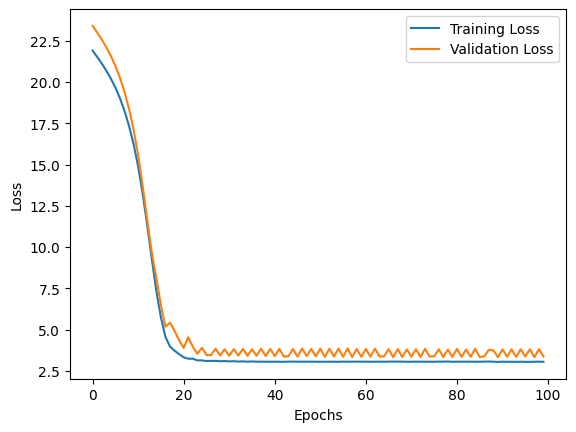

In [22]:
import matplotlib.pyplot as plt

plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Try to improve the model

In [51]:
# Build a neural network model to fit on our insurance data
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)), # 128 units, ReLU activation
  tf.keras.layers.Dropout(0.2), # Dropout layer to prevent overfitting
  tf.keras.layers.Dense(64, activation='relu'), # 64 units, ReLU activation
  tf.keras.layers.BatchNormalization(), # Batch normalization layer
  tf.keras.layers.Dense(32, activation='relu'), # 32 units, ReLU activation
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae"])

# 3. Fit the model with validation split
model_2_history = model_2.fit(X_train, y_train, epochs=200, validation_split=0.2)

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 398.2103 - mae: 18.2682 - val_loss: 166.7846 - val_mae: 11.1383
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 91.3444 - mae: 7.5391 - val_loss: 71.7584 - val_mae: 6.0446
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 49.4935 - mae: 5.5806 - val_loss: 32.9629 - val_mae: 4.7359
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 27.9142 - mae: 4.2261 - val_loss: 22.0829 - val_mae: 3.6915
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 20.8524 - mae: 3.5516 - val_loss: 23.9328 - val_mae: 3.9022
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.4095 - mae: 3.0395 - val_loss: 29.1323 - val_mae: 4.0510
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.7392 - mae: 3.0049 - val_loss: 37.1366 - val_mae: 4.6287
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.2582 - mae: 2.6416 - val_loss: 38.4077 - val_mae: 4.4634
Epoch 9/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5

In [52]:
test_loss, test_mae = model_2.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 17.5842 - mae: 2.7395
Test MAE: 3.0815179347991943


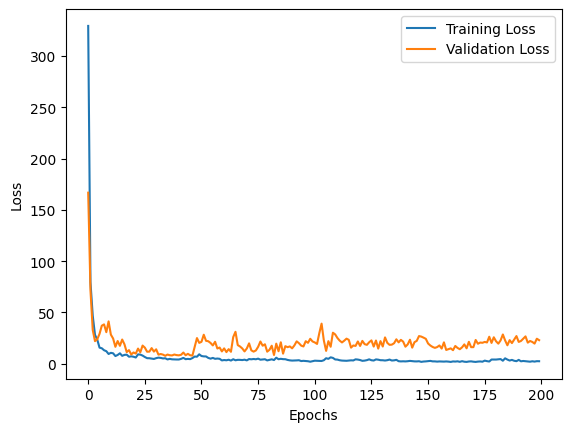

In [53]:
import matplotlib.pyplot as plt

plt.plot(model_2_history.history['loss'], label='Training Loss')
plt.plot(model_2_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Make some predictions

In [58]:
import numpy as np

# Make predictions
predictions_1 = model_1.predict(X_test)

# Print the first 10 predictions and their corresponding true values
for i in range(10):
    print(f"Prediction: {predictions_1[i][0]}, True Value: {y_test[i]}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Prediction: 8.794380187988281, True Value: 7.2
Prediction: 19.698076248168945, True Value: 18.8
Prediction: 21.822574615478516, True Value: 19.0
Prediction: 27.166275024414062, True Value: 27.0
Prediction: 25.35185432434082, True Value: 22.2
Prediction: 20.867036819458008, True Value: 24.5
Prediction: 30.03329849243164, True Value: 31.2
Prediction: 25.113073348999023, True Value: 22.9
Prediction: 19.033008575439453, True Value: 20.5
Prediction: 19.509519577026367, True Value: 23.2


In [59]:
import numpy as np

def calculate_mean_error_percentage(model, X_test, y_test):
    """
    Calculate the mean error percentage for a given model and test data.

    Parameters:
    model (tf.keras.Model): The trained model.
    X_test (np.ndarray): The test data features.
    y_test (np.ndarray): The true values for the test data.

    Returns:
    float: The mean error percentage.
    """
    # Make predictions
    predictions = model.predict(X_test)

    # Calculate error percentages
    error_percentages = np.abs((predictions.flatten() - y_test) / y_test) * 100

    # Calculate and return the mean error percentage
    mean_error_percentage = np.mean(error_percentages)
    return mean_error_percentage

In [60]:
mean_error_percentage_1 = calculate_mean_error_percentage(model_1, X_test, y_test)
print(f"Mean Error Percentage of Model 1: {mean_error_percentage_1:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Mean Error Percentage of Model 1: 15.90%


In [61]:
mean_error_percentage_2 = calculate_mean_error_percentage(model_2, X_test, y_test)
print(f"Mean Error Percentage of Model 2: {mean_error_percentage_2:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Mean Error Percentage of Model 2: 15.71%
